<a href="https://colab.research.google.com/github/Tauf752/Tugas-Pemrograman-Python-Minggu-10/blob/main/Imageclass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive

In [67]:
cd /content/drive/MyDrive/Untitled folder

/content/drive/MyDrive/Untitled folder


In [68]:
ls

 3scene@   hutan.jpg  'jalan tol.jpg'   laut.jpg


In [69]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [70]:
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [71]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [72]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [73]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [74]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [84]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)


In [85]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(128*128*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [86]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 49152)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               4915300   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 4,917,239
Trainable params: 4,917,239
Non-trainable params: 0
_________________________________________________________________


In [90]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 1s 59ms/step - loss: 1.7523 - accuracy: 0.5710 - val_loss: 0.9582 - val_accuracy: 0.5992
Epoch 2/25
23/23 [==============================] - 1s 48ms/step - loss: 0.8664 - accuracy: 0.7018 - val_loss: 0.9365 - val_accuracy: 0.5907
Epoch 3/25
23/23 [==============================] - 1s 48ms/step - loss: 0.7015 - accuracy: 0.6976 - val_loss: 0.8504 - val_accuracy: 0.6076
Epoch 4/25
23/23 [==============================] - 1s 43ms/step - loss: 0.5806 - accuracy: 0.7103 - val_loss: 0.9417 - val_accuracy: 0.5865
Epoch 5/25
23/23 [==============================] - 1s 44ms/step - loss: 0.5424 - accuracy: 0.7032 - val_loss: 0.7698 - val_accuracy: 0.6371
Epoch 6/25
23/23 [==============================] - 1s 43ms/step - loss: 0.5621 - accuracy: 0.7089 - val_loss: 1.2586 - val_accuracy: 0.6076
Epoch 7/25
23/23 [==============================] - 1s 44ms/step - loss: 0.6371 - accuracy: 0.7046 - val_loss: 1.3233 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


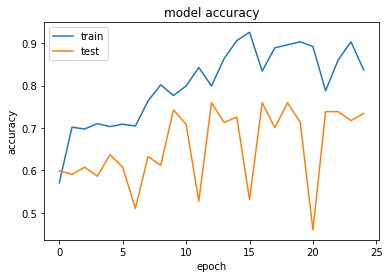

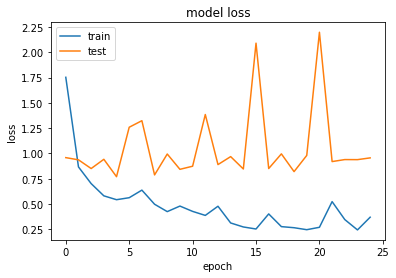

In [91]:
import matplotlib.pyplot as plt

print(H.history.keys())

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.71      0.82      0.76        90
      forest       0.89      0.71      0.79        78
     highway       0.63      0.65      0.64        69

    accuracy                           0.73       237
   macro avg       0.74      0.73      0.73       237
weighted avg       0.75      0.73      0.74       237



In [94]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [103]:
import cv2
import matplotlib.pyplot as plt
image1='laut.jpg'

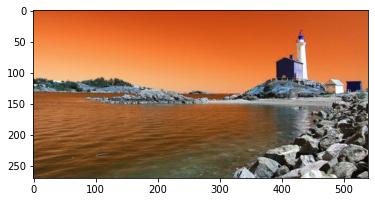

In [104]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [105]:
image_testing = Image.open('laut.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [106]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [107]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[8.7902063e-01 1.2439371e-05 1.2096697e-01]]
['coast']
